
# Laboratorium 02
## Metoda najmniejszych kwadratów
Iga Antonik, Helena Szczepanowska

# Zadanie 1.
Celem zadania jest zastosowanie metody najmniejszych kwadratów do predykcji, czy nowotwór jest złośliwy (ang. malignant) czy łagodny (ang. benign). Nowotwory złośliwe i łagodne mają różne charakterystyki wzrostu. Istotne cechy to m. in. promień i tekstura. Charakterystyki te wyznaczane są poprzez diagnostykę obrazową i biopsje.
Do rozwiązania problemu wykorzystamy bibliotekę pandas, typ DataFrame oraz dwa zbiory danych: <br/>

- breast-cancer-train.dat

- breast-cancer-validate.dat.

Nazwy kolumn znajdują się w pliku breast-cancer.labels. Pierwsza kolumna to identyfikator pacjenta patient ID. Dla każdego pacjenta wartość w kolumnie Malignant/Benign wskazuje klasę, tj. czy jego nowotwór jest złośliwy czy łagodny. Pozostałe 30 kolumn zawiera cechy, tj. charakterystyki nowotworu. <br/>

- (a) Otwórz zbiory breast-cancer-train.dat i breast-cancer-validate.dat używając funkcji pd.io.parsers.read csv z biblioteki pandas.

- (b) Stwórz histogram i wykres wybranej kolumny danych przy pomocy funkcji hist oraz plot. Pamiętaj o podpisaniu osi i wykresów.

- (c) Stwórz reprezentacje danych zawartych w obu zbiorach dla liniowej i kwadratowej metody najmniejszych kwadratów (łącznie 4 macierze). Dla reprezentacji kwadratowej użyj tylko podzbioru dostępnych danych, tj. danych z kolumnradius (mean), perimeter (mean), area (mean), symmetry (mean).

- (d) Stwórz wektor b dla obu zbiorów (tablicę numpy 1D-array o rozmiarze identycznym jak rozmiar kolumny Malignant/Benign odpowiedniego zbioru danych). Elementy wektora b to 1 jeśli nowotwór jest złośliwy, -1 w przeciwnym wypadku. Funkcja np.where umożliwi zwięzłe zakodowanie wektora b.

- (e) Znajdź wagi dla liniowej oraz kwadratowej reprezentacji najmniejszych kwadratów przy pomocy macierzy A zbudowanych na podstawie zbioru breast-cancer-train.dat. Potrzebny będzie także wektor b zbudowany na podstawie zbioru breast-cancer-train.dat.

Uwaga. Problem najmniejszych kwadratów należy rozwiązać stosując równanie normalne (tj. nie używając funkcji scipy.linalg.lstsq). Rozwiązując równanie normalne należy użyć funkcji solve, unikając obliczania odwrotności macierzy funkcją scipy.linalg.pinv.

- (f) Oblicz współczynniki uwarunkowania macierzy, cond(AT A), dla liniowej i kwadratowej metody najmniejszych kwadratów.

- (g) Sprawdź jak dobrze otrzymane wagi przewidują typ nowotworu (łagodny czy złośliwy). W tym celu pomnóż liniową reprezentację zbioru breast-cancer-validate.dat oraz wyliczony wektor wag dla reprezentacji liniowej. Następnie powtórz odpowiednie mnożenie dla reprezentacji kwadratowej. Zarówno dla reprezentacji liniowej jak i kwadratowej otrzymamy wektor p. Zakładamy, że jeśli p[i] > 0, to i-ta osoba (prawdopodobnie) ma nowotwór złośliwy. Jeśli p[i] ≤ 0 to i-ta osoba (prawdopodobnie) ma nowotwór łagodny. <br/>

Porównaj wektory p dla reprezentacji liniowej i kwadratowej z wektorem b (użyj reguł p[i] > 0 oraz p[i] ≤ 0). <br/>

Oblicz liczbę fałszywie dodatnich (ang. false-positives) oraz fałszywie ujemnych (ang. false-negatives) przypadków dla obu reprezentacji. Przypadek fałszywie dodatni zachodzi, kiedy model przewiduje nowotwór złośliwy, gdy w rzeczywistości nowotwór był łagodny. Przypadek fałszywie ujemny za- chodzi, kiedy model przewiduje nowotwór łagodny, gdy w rzeczywistości nowotwór był złośliwy.

## Rozwiązanie 

### Biblioteki
Korzystam z biblioteki NumPy ze względu na jej zalety w pracy z wielowymiarowymi tablicami danych oraz operacjami numerycznymi. 
Używam także biblioteki Pandas, która umożliwia efektywną pracę z danymi w postaci tabelarycznej.
Do rysowania wykresów wykorzystuję bibliotekę matplotlib.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import solve, cond

Wczytanie nazw kolumn z pliku

In [3]:
labels_path = './breast-cancer.labels'
with open(labels_path, 'r') as file:
    column_names = file.read().splitlines()

Wczytanie zbiorów danych

In [4]:
train_data_path = './breast-cancer-train.dat'
validate_data_path = './breast-cancer-validate.dat'
train_data = pd.io.parsers.read_csv(train_data_path, header=None, names=column_names)
validate_data = pd.io.parsers.read_csv(validate_data_path, header=None, names=column_names)

### Histogram dla kolumny 'radius (mean)'

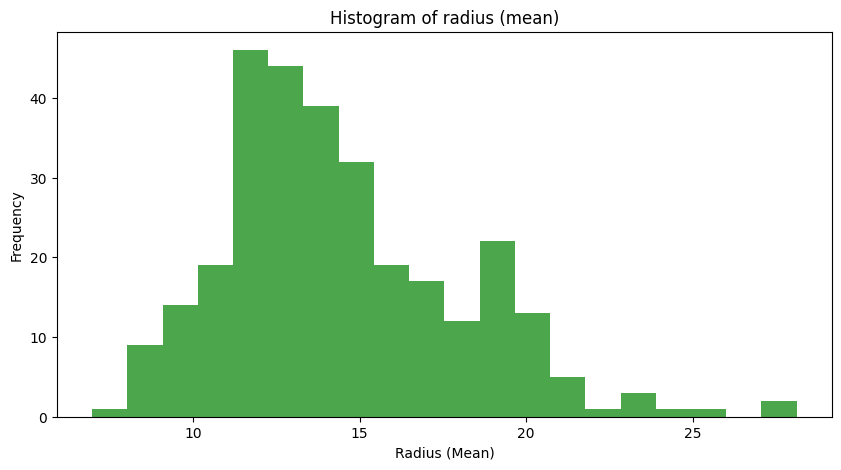

In [5]:
plt.figure(figsize=(10, 5))
plt.hist(train_data['radius (mean)'], bins=20, color='green', alpha=0.7)
plt.title('Histogram of radius (mean)')
plt.xlabel('Radius (Mean)')
plt.ylabel('Frequency')
plt.show()

### Wykres liniowy dla kolumny 'radius (mean)'

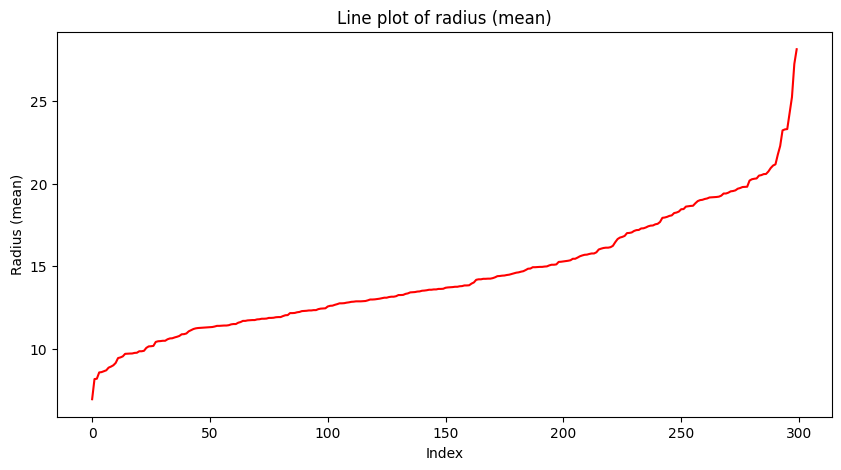

In [6]:
plt.figure(figsize=(10, 5))
plt.plot(train_data['radius (mean)'].sort_values().reset_index(drop=True), color='red')
plt.title('Line plot of radius (mean)')
plt.xlabel('Index')
plt.ylabel('Radius (mean)')
plt.show()

Na wykresach mozemy zaobserwowac, ze zdecydowana wiekszosc pacjentów posiada guza, którego średnica jest między 10 a 20. Wykres liniowy został narysowany dla rosnących wartości średnicy aby lepiej mozna było zaobserwować tendencję wielkości.

### Przygotowanie macierzy dla metod liniowej i kwadratowej <br/>
Dla metody liniowej macierz wygląda następująco:

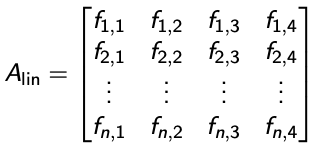

A dla kwadratowej:

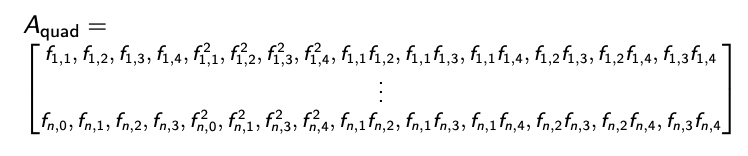

In [7]:
columns_quadratic = ['radius (mean)', 'perimeter (mean)', 'area (mean)', 'symmetry (mean)']
cq = columns_quadratic

A_train_linear = np.matrix(train_data.iloc[:, 2:])
A_validate_linear = np.matrix(validate_data.iloc[:, 2:])

train_quadratic = train_data[columns_quadratic]
validate_quadratic = validate_data[columns_quadratic]

quadratic_square =  np.square(train_quadratic)
quadratic_product = pd.concat([train_quadratic[cq[0]]*train_quadratic[cq[1]], train_quadratic[cq[0]]*train_quadratic[cq[2]], 
                              train_quadratic[cq[0]]*train_quadratic[cq[3]], train_quadratic[cq[1]]*train_quadratic[cq[2]], 
                              train_quadratic[cq[1]]*train_quadratic[cq[3]], train_quadratic[cq[2]]*train_quadratic[cq[3]]], axis = 1)

A_train_quadratic = np.concatenate((train_quadratic, quadratic_square, quadratic_product), axis = 1)

validate_square =  np.square(validate_quadratic)
validate_product = pd.concat([validate_quadratic[cq[0]]*validate_quadratic[cq[1]], validate_quadratic[cq[0]]*validate_quadratic[cq[2]], 
                              validate_quadratic[cq[0]]*validate_quadratic[cq[3]], validate_quadratic[cq[1]]*validate_quadratic[cq[2]], 
                              validate_quadratic[cq[1]]*validate_quadratic[cq[3]], validate_quadratic[cq[2]]*validate_quadratic[cq[3]]], axis = 1)

A_validate_quadratic = np.concatenate((validate_quadratic, validate_square, validate_product), axis = 1)


### Stworzenie wektorów b

In [8]:
b_train = np.where(train_data['Malignant/Benign'] == 'M', 1, -1)
b_validate = np.where(validate_data['Malignant/Benign'] == 'M', 1, -1)

### Znalezienie wag metodą najmniejszych kwadratów

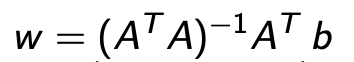

In [9]:
weights_linear = solve(A_train_linear.T @ A_train_linear, A_train_linear.T @ b_train[:, np.newaxis]).flat
weights_quadratic = solve(A_train_quadratic.T @ A_train_quadratic, A_train_quadratic.T @ b_train[:, np.newaxis]).flat

### Obliczenie współczynników uwarunkowania macierzy

In [10]:
cond_linear = cond(A_train_linear.T @ A_train_linear)
cond_quadratic = cond(A_train_quadratic.T @ A_train_quadratic)

print("cond_linear: ",cond_linear, "\n cond_quadratic: ",cond_quadratic)

cond_linear:  1809248222566.8225 
 cond_quadratic:  9.056816948763561e+17


### Obliczenie fałszywie dodatnich oraz fałszywie ujemnych przypadków

In [11]:
p_linear = A_validate_linear @ weights_linear
p_quadratic = A_validate_quadratic @ weights_quadratic

predictions_linear = np.where(p_linear > 0, 1, -1)
predictions_quadratic = np.where(p_quadratic > 0, 1, -1)

fp_linear = np.sum((predictions_linear == 1) & (b_validate == -1))
fn_linear = np.sum((predictions_linear == -1) & (b_validate == 1))
fp_quadratic = np.sum((predictions_quadratic == 1) & (b_validate == -1))
fn_quadratic = np.sum((predictions_quadratic == -1) & (b_validate == 1))

positive = np.sum(b_validate == 1)
negative = np.sum(b_validate == -1)
print("positive", positive, "negative", negative)

linear_accuracy = ((positive - fn_linear) + (negative - fp_linear))/ (positive + negative)
quadratic_accuracy = ((positive - fn_quadratic) + (negative - fp_quadratic))/ (positive + negative)
print("linear accuracy:", linear_accuracy)
print("quadratic accuracy:", quadratic_accuracy)

print("Linear \n False Positive:", fp_linear, "\n False Negative:", fn_linear)
print("Quadratic \n False Positive:", fp_quadratic, "\n False Negative:", fn_quadratic)



positive 60 negative 200
linear accuracy: 0.9692307692307692
quadratic accuracy: 0.9230769230769231
Linear 
 False Positive: 6 
 False Negative: 2
Quadratic 
 False Positive: 15 
 False Negative: 5


## Wnioski

Jak mozna zauwazyc waga oraz macierz otrzymane przy pomocy liniowej metody najmniejszych kwadratów dały mniej zarówno fałszywie pozytywnych jak i fałszywie negatywnych wyników niz metoda kwadratowa. Moze to wynikac z faktu, ze do macierzy tworzonej dla metody kwadratowej przekazalismy mniej danych. 

Współczynnik uwarunkowania macierzy dla liniowej reprezentacji jest równiez o wiele mniejszy od współczynnika wyliczonego dla reprezentacji kwadratowej. Oznacza to, ze w większym stopniu błąd reprezentacji numerycznej danych wejściowych wpływa na błąd wyniku w reprezentacji kwadratowej.  

Podsumowując, przeprowadzona analiza pokazuje, ze ilość przekazanych do modelu danych oraz wybór metody jaką będziemy te dane analizać ma kluczowy wpływ na wyniki jakie otrzymamy. Zadna z uzytych metod nie dała idealnych wyników, ale metoda liniowa najmniejszych kwadratów sprawdziła się lepiej.

## Bibliografia
http://heath.cs.illinois.edu/scicomp/notes/cs450_chapt03.pdf

https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html

prezentacja Least squares metod Marcin Kuta